In [239]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/gra

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [240]:
import time
 
from bs4 import BeautifulSoup
 
#driver = webdriver.Chrome()
driver.implicitly_wait(30)

In [241]:
import requests
import pandas as pd
from datetime import datetime
import ast
import time

In [242]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}

In [243]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.kathimerini.gr/search/covid19/")
 
 
    last_height = driver.execute_script("return document.body.scrollHeight")
 
    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height
 
 
 
finally:
#    driver.quit()
    print("OK")

height: 6370
height = 6370
OK


In [244]:
html = driver.page_source.encode('utf-8')
 
soup = BeautifulSoup(html, "html.parser")

In [245]:
response = requests.get("https://www.kathimerini.gr/search/covid19/", headers=headers)
 
doc = BeautifulSoup(response.text)

In [246]:
from selenium import webdriver
import time
 
url = "https://www.kathimerini.gr/search/covid19/"
 
 
driver.get(url)
html = driver.page_source.encode('utf-8')
page_num = 0
 
driver.find_element_by_css_selector('.css-17ovhjm.css-17ovhjm .qc-cmp2-footer .qc-cmp2-summary-buttons button:last-child').click()
 
 
while driver.find_elements_by_css_selector('.nx_loadmore'):
    driver.find_element_by_css_selector('.nx_loadmore').click()
    page_num += 1
    print("getting page number "+str(page_num))
    time.sleep(1)
 
html = driver.page_source.encode('utf-8')
doc = BeautifulSoup(html, "html.parser")

getting page number 1
getting page number 2


In [247]:
# Ξεκινάμε με μια άδεια λίστα
from datetime import datetime
import re as re
stories_list = []
stories = doc.find_all('article')
for story in stories:
    headline = story.find('h2')
    summary = story.find('p')
    link = story.a['href']
    releasedate = story.find('span', { 'class' : 'meta-date' })
    # Έχει η ιστορία summary?
    if summary:
        summary_text = summary.text
    else:
        summary_text = ''
        
        # Φτιάξε ένα λεξικό αν ΕΧΕΙ summary
    story_dict = {
            'headline': headline.text,
            'summary': summary_text,
            'link': link,
            'releasedate': releasedate.text
        }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)
 
print(stories_list)
 
# Τώρα που τελειώσαμε μετέτρεψε το σε CSV και αποθήκευσε το.
# Αν δεν χρησιμοποιήσετε το index=False, θα έχετε ένα άσχημο dataframe!
import pandas as pd
kathimerini = pd.DataFrame(stories_list)
 
kathimerini['releasedate'] = pd.to_datetime(kathimerini['releasedate'], format='%d.%m.%Y / %H:%M')
 
kathimerini.to_csv("kathimerini.csv", index=False)

[{'headline': 'Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατά της covid19 των εφήβων 12-15 ετών', 'summary': 'Θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών, έδωσε το Ανώτατο Συμβούλιο Υγείας του Βελγίου, προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωτα.', 'link': 'https://www.kathimerini.gr/world/561423979/velgio-thetiki-eisigisi-gia-ton-emvoliasmo-kata-tis-covid19-ton-efivon-12-15-eton/', 'releasedate': '06.07.2021 / 15:31'}, {'headline': 'Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,98% αποτελεσματικό έπειτα από 3 δόσεις', 'summary': 'Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κατά της COVID-19 που κατασκευάζονται στην Κούβα –και ένα από τα πρώτα που αναπτύχθηκαν στη Λατινική Αμερική–, έχει αποτελεσματικότητα 92,28% έναντι της νόσου, ανακοίνωσε χθες Δευτέρα το εργαστήριο που το δημιούργησε. ', 'link': 'https://www.kathimerini.gr/world/561406834/emvoliasmos-covid19-to-koyvaniko-ampntala-92-98-

In [248]:
kathimerini

,headline,summary,link,releasedate
0,Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...,Θετική εισήγηση για τον εμβολιασμό κατά της co...,https://www.kathimerini.gr/world/561423979/vel...,2021-07-06 15:31:00
1,"Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...","Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κα...",https://www.kathimerini.gr/world/561406834/emv...,2021-06-22 07:49:00
2,Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...,https://www.kathimerini.gr/society/561380464/p...,2021-05-28 21:54:00
3,Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...,Το «EU digital Covid certificate» θα εκδίδεται...,https://www.kathimerini.gr/society/561379552/p...,2021-05-28 12:25:00
4,Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...,Πέθανε από COVID19 ο παλαιός πρωταθλητής και «...,https://www.kathimerini.gr/society/561323353/v...,2021-04-08 17:05:00
5,Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...,https://www.kathimerini.gr/economy/561242983/e...,2021-01-27 10:49:00
6,Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...,https://www.kathimerini.gr/society/561141022/l...,2020-11-02 17:21:00
7,Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...,https://www.kathimerini.gr/world/561116779/sto...,2020-10-14 16:04:00
8,Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...,https://www.kathimerini.gr/world/561106261/eyr...,2020-10-06 15:32:00
9,Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.,Η εμφάνιση του Covid19 και τα αναγκαία για τον...,https://www.kathimerini.gr/economy/561100033/t...,2020-10-01 13:03:00


In [249]:
 kathimerini['fulltext']=0
for ind in kathimerini.index:
     #print(kathimerini['link'][ind])
     urln = requests.get(kathimerini['link'][ind])
     docstory = BeautifulSoup(urln.text) 
     artstory = docstory.findAll('p')
     full_text = ''
     for p in artstory:
      text = p.text.replace(',', '').replace('"', '').replace('.', '').replace("'", "").replace('?', '').replace("\n", "").replace('\r', '')
      full_text += text
     kathimerini['fulltext'][ind]=full_text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [250]:
kathimerini

,headline,summary,link,releasedate,fulltext
0,Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...,Θετική εισήγηση για τον εμβολιασμό κατά της co...,https://www.kathimerini.gr/world/561423979/vel...,2021-07-06 15:31:00,Θετική εισήγηση για τον εμβολιασμό κατά της co...
1,"Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...","Το Αμπντάλα, το ένα από τα υποψήφια εμβόλια κα...",https://www.kathimerini.gr/world/561406834/emv...,2021-06-22 07:49:00,Το Αμπντάλα το ένα από τα υποψήφια εμβόλια κατ...
2,Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...,https://www.kathimerini.gr/society/561380464/p...,2021-05-28 21:54:00,Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...
3,Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...,Το «EU digital Covid certificate» θα εκδίδεται...,https://www.kathimerini.gr/society/561379552/p...,2021-05-28 12:25:00,Πώς ακριβώς λειτουργεί το ευρωπαϊκό «Ψηφιακό Π...
4,Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...,Πέθανε από COVID19 ο παλαιός πρωταθλητής και «...,https://www.kathimerini.gr/society/561323353/v...,2021-04-08 17:05:00,Ο Βασίλης Σεβαστής δεν κατάφερε να βγει νικητή...
5,Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...,https://www.kathimerini.gr/economy/561242983/e...,2021-01-27 10:49:00,Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...
6,Λέρος: Ξέχασαν στο πλοίο δείγματα για Covid19 ...,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...,https://www.kathimerini.gr/society/561141022/l...,2020-11-02 17:21:00,Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...
7,Στο «κόκκινο» η Ευρώπη- Ξεπέρασε σε νέα κρούσμ...,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...,https://www.kathimerini.gr/world/561116779/sto...,2020-10-14 16:04:00,Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...
8,Ευρώπη- Covid19: Στο «στόχαστρο» και πάλι οι μ...,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...,https://www.kathimerini.gr/world/561106261/eyr...,2020-10-06 15:32:00,To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...
9,Το αποτύπωμα του Covid19 στις εισηγμένες του Χ.Α.,Η εμφάνιση του Covid19 και τα αναγκαία για τον...,https://www.kathimerini.gr/economy/561100033/t...,2020-10-01 13:03:00,Η εμφάνιση του Covid19 και τα αναγκαία για τον...


In [251]:
kathimerini['releasedate'] = pd.to_datetime(kathimerini['releasedate'], format='%a %b %d %H:%M:%S +0000 %Y')

In [252]:
kathimerini['fulltext'] = kathimerini['fulltext'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [253]:
kathimerini['year'] = pd.DatetimeIndex(kathimerini['releasedate']).year
kathimerini['month'] = pd.DatetimeIndex(kathimerini['releasedate']).month
kathimerini['day'] = pd.DatetimeIndex(kathimerini['releasedate']).day

Διαγράμματα χρονικής συσχέτισης

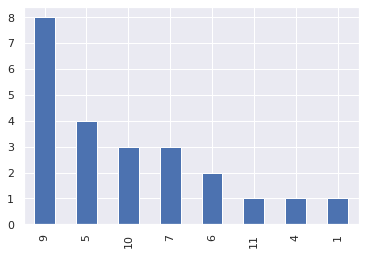

In [254]:
kathimerini['month'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


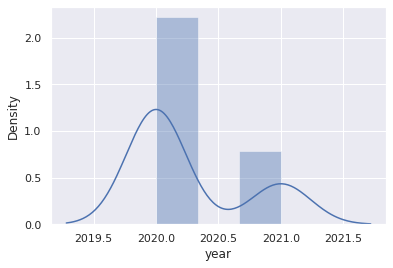

In [255]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()


sns.distplot(kathimerini['year'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


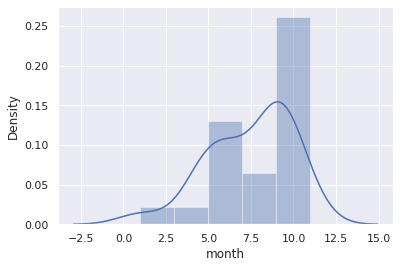

In [256]:
sns.distplot(kathimerini['month'])

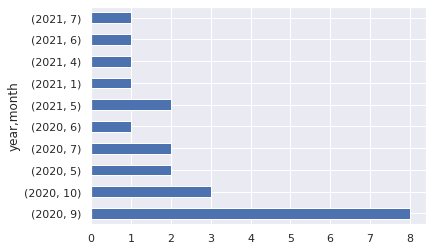

In [257]:
kathimerini.groupby('year')["month"].value_counts().groupby(level=0).head(5).plot(kind='barh')

In [258]:
import matplotlib.pyplot as plt

In [259]:
kathimerini.to_csv("kathimerini.csv", index=False)

In [260]:
kathimerini.to_excel('kathimerini.xls', index=False)

Heatmap

In [261]:
data_url = 'kathimerini.csv'
gapminder = pd.read_csv(data_url)
print(gapminder.head(6))

                                            headline  ... day
0  Βέλγιο: Θετική εισήγηση για τον εμβολιασμό κατ...  ...   6
1  Εμβολιασμός-COVID19: Το κουβανικό Αμπντάλα 92,...  ...  22
2  Ψηφιακό πιστοποιητικό Covid19: Αναλυτικός οδηγ...  ...  28
3  Ψηφιακό πιστοποιητικό Covid19: Η διαδικασία έκ...  ...  28
4  Βασίλης Σεβαστής: Πέθανε από COVID19 ο παλαιός...  ...   8
5  Εφαρμογή με ελληνικές ρίζες στη μάχη κατά της ...  ...  27

[6 rows x 8 columns]


In [262]:
df1 = gapminder[['year', 'month', 'day']]
print(df1.head(3))

   year  month  day
0  2021      7    6
1  2021      6   22
2  2021      5   28


In [263]:
heatmap1_data = pd.pivot_table(df1, values='year', 
                     index=['day'], 
                     columns='month')

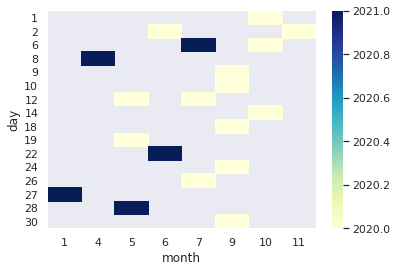

In [264]:
sns.heatmap(heatmap1_data, cmap="YlGnBu")

In [265]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [266]:
def load_kathimerini():
    return pd.read_csv("kathimerini.csv", delimiter="\t")

data = load_kathimerini()
kathimerini = kathimerini["fulltext"]
print(kathimerini)

0     Θετική εισήγηση για τον εμβολιασμό κατά της co...
1     Το Αμπντάλα το ένα από τα υποψήφια εμβόλια κατ...
2     Ένα σημαντικό βήμα για τη σταδιακή μετάβαση στ...
3     Πώς ακριβώς λειτουργεί το ευρωπαϊκό «Ψηφιακό Π...
4     Ο Βασίλης Σεβαστής δεν κατάφερε να βγει νικητή...
5     Στα 17 του χρόνια ο Θεσσαλονικιός Γιώργος Χατζ...
6     Η ένωση γιατρών του κρατικού θεραπευτηρίου νοσ...
7     Η μάχη της Ευρώπης να θέσει υπό έλεγχο το δεύτ...
8     To δεύτερο κύμα της πανδημίας του νέου κορωνοϊ...
9     Η εμφάνιση του Covid19 και τα αναγκαία για τον...
10    Από την πρώτη του εμφάνιση σε μία υπαίθρια αγο...
11    Η πανδημία του Covid19 έφερε ανατροπές στην κα...
12    Οι εντεινόμενες ανησυχίες για τις οικονομικές ...
13    Στροφή στην τηλεργασία όπου αυτό ήταν εφικτό α...
14    Την ανάγκη να χορηγηθούν επιπλέον 35 δισ δολάρ...
15    Από την πρώτη στιγμή που ο ΠΟΥ κήρυξε παγκόσμι...
16    Την ώρα που οι οικονομίες βυθίζονται στην ύφεσ...
17    Η αναστολή των δοκιμών του εμβολίου από τη

In [267]:
kathimerini_lower = list(map(lambda x:x.lower(),kathimerini))
print (kathimerini_lower)

['θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατε

In [268]:
import re

kathimerini_as_string = ''.join(kathimerini_lower)

rt_regex = re.sub('rt @', " ", kathimerini_as_string)
rt_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [269]:
usernames_regex = re.sub(r"@[^ \.]+", " ", rt_regex)
usernames_regex


'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [270]:
#diagrafi hashtags
hashtags_regex = re.sub(r"#[^ \.]+"," ",usernames_regex)
hashtags_regex


'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [271]:
#diagrafi links
links_regex = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", hashtags_regex)
links_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [272]:
# diagrafi\n\n 

new_lines_regex = re.sub('\n\n', " ", links_regex)
new_lines_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [273]:
# diagrafi &amp;

amp_regex = re.sub('&amp;', " ", new_lines_regex)
amp_regex

'θετική εισήγηση για τον εμβολιασμό κατά της covid-19 των εφήβων 12-15 ετών έδωσε το ανώτατο συμβούλιο υγείας του βελγίου προτείνοντας ωστόσο τον εμβολιασμό μόνο των ευπαθών εφήβων ή όσων βρίσκονται κοντά σε άτομα που είναι ευάλωταόπως αναφέρει σημερινό πρωτοσέλιδο δημοσίευμα της γαλλόφωνης εφημερίδας «le soir» το βέλγιο επιμένει στη «συντονισμένη ελεύθερη επιλογή» όσον αφορά τον εμβολιασμό των εφήβων και σε αντίθεση με άλλες χώρες όπως η γαλλία ή το ισραήλ το βέλγιο δεν θα πρέπει να εμβολιάζει συστηματικά όλους τους εφήβους ηλικίας 12-15 ετών\xa0το ανώτατο συμβούλιο υγείας (css) που θα υποβάλλει τη γνωμοδότησή του σήμερα το απόγευμα στις αρμόδιες αρχές επισημαίνει τις συγκεκριμένες καταστάσεις στις οποίες μπορεί να συνιστάται ο εμβολιασμός των νέων εφήβων είτε είναι παιδιά με συν-νοσογόνους παράγοντες (λευχαιμία χρόνιες παθήσεις των νεφρών ή του ήπατος σύνδρομο down κλπ) επίσης η έμμεση προστασία πιο ευάλωτων συγγενών (παππούδες γονείς αδέλφια και αδελφές με συννοσηρότητα ή ανοσοκατεσ

In [274]:
#Wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [275]:
list(STOPWORDS)[0:20]

["i've",
 'all',
 'such',
 'under',
 'for',
 "isn't",
 'ours',
 'or',
 'www',
 'ever',
 "haven't",
 'itself',
 'has',
 'it',
 'these',
 'whom',
 'am',
 "where's",
 'with',
 "you'd"]

In [276]:
import spacy

In [277]:
!python -m spacy download el_core_news_sm
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [278]:
nlp = spacy.load("el_core_news_sm")

In [279]:
nlp_en=spacy.load('en_core_web_sm')

In [280]:
from spacy.lang.en.stop_words import STOP_WORDS
english_stopwords=list(STOP_WORDS)

print(english_stopwords)

['say', 'another', 'has', 'thus', 'nobody', 'toward', 'third', 'made', 'its', 'here', 'per', 'which', 'her', 'moreover', 'side', '’re', 'nevertheless', 'whereas', 'what', 'already', 'unless', 'yet', 'them', 'call', 're', 'became', 'one', 'via', 'even', 'may', 'should', 'wherein', 'twenty', 'anyhow', 'herein', 'hundred', 'latterly', 'go', 'however', 'fifteen', 'among', 'being', 'bottom', 'alone', 'almost', 'become', 'more', 'of', 'yourselves', 'least', '‘ll', 'every', 'latter', "'ve", 'becomes', '’m', 'could', 'down', 'thereupon', 'who', 'she', 'indeed', 'we', 'no', 'cannot', 'few', 'others', 'whence', '’ve', 'ten', 'neither', 'ever', 'everyone', 'due', 'amongst', 'it', 'amount', 'am', 'with', 'behind', 'thru', 'the', 'that', 'see', 'and', 'does', 'too', 'get', 'give', 'hence', 'several', 'n’t', 'sometimes', 'make', 'to', 'must', 'three', 'n‘t', 'this', 'eight', 'hers', 'his', 'some', 'many', 'thereby', 'after', '‘re', 'fifty', 'any', 'beside', 'myself', 'twelve', 'anything', 'nine', 'o

In [281]:
list(nlp.Defaults.stop_words)[0:1500]

['είτε',
 'ετούτης',
 'έχω',
 'μόνων',
 'τα',
 'απόψε',
 'κάμποσων',
 'μα',
 'άλλη',
 'οποίου',
 'περισσότερο',
 'εμάς',
 'ταύτων',
 'έτερες',
 'έχουμε',
 'εντός',
 'μέλει',
 'ότι',
 'ποιούς',
 'πέρσι',
 'όλον',
 'έχει',
 'εσένα',
 'υπόψη',
 'καθόλου',
 'είχαν',
 'άμα',
 'εαυτού',
 'καμία',
 'όποια',
 'αλλά',
 'συγχρόνως',
 'μονομιάς',
 'αυτό',
 'ένα',
 'προς',
 'σαν',
 'μέλλεται',
 'εξίσου',
 'εκείνες',
 'μάλιστα',
 'τυχόν',
 'μετά',
 'τρίτη',
 'όσης',
 'εν',
 'ποιά',
 'οποίος',
 'περί',
 'μερικά',
 'αύριο',
 'ίδιον',
 'τούτα',
 'αλλιώς',
 'λιγάκι',
 'πιθανόν',
 'πουθενά',
 'πάντα',
 'συχνές',
 'μόνην',
 'ήσαστε',
 'στου',
 'για',
 'πρόπερσι',
 'κάμποσον',
 'ετούτους',
 'εκείνον',
 'οποίων',
 'στους',
 'ετούτοι',
 'απ',
 'μόνη',
 'κανέναν',
 'πάνω',
 'δικού',
 'πόσες',
 'ετέρων',
 'όσου',
 'ξαφνικά',
 'αντίς',
 'οποιαδήποτε',
 'οσοσδήποτε',
 'εντωμεταξύ',
 'όλη',
 'ίδιες',
 'εδώ',
 'κακά',
 'ετούτων',
 'μεμιάς',
 'ίδιων',
 'ιδίως',
 'μόνοι',
 'μερικές',
 'οσουδήποτε',
 'συχνήν',
 'κάπ

In [282]:
def remove_punctuation(text):
	dict = {
			u"'": "",
      u"&": "",
      u"(": "",
      u")": "",
      u"2": "",
			"'": "",
			u",": "",
			",": "",
			u".": "",
			".": "",
			u"``": "",
			"``": "",
			u"''": "",
			"''": "",
			u'"': "",
			'"': "",
			u"[":"",
			"[":"",
			u"]":"",
			"]":"",
			u">": "",
			">": "",
			u"<": "",
			"<": "",
			u";": "",
			";": "",
			u"·": "",
			'·': "",
			u"‘": "",
			"‘": "",
			u"’": "",
			"’": "",
			"–": "",
			u"–": "",
      "και":"",
      ":":"",
      "!":"",
      u";":"",
      "»":"",
      "«":"",
      "%":"",
      " ή ":"",
      " κ ":""

			}
	regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))
	return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)


In [283]:
final_text=remove_punctuation(amp_regex)

In [284]:
gr_stopwords=list(nlp.Defaults.stop_words)
final_stopwords=gr_stopwords+ english_stopwords

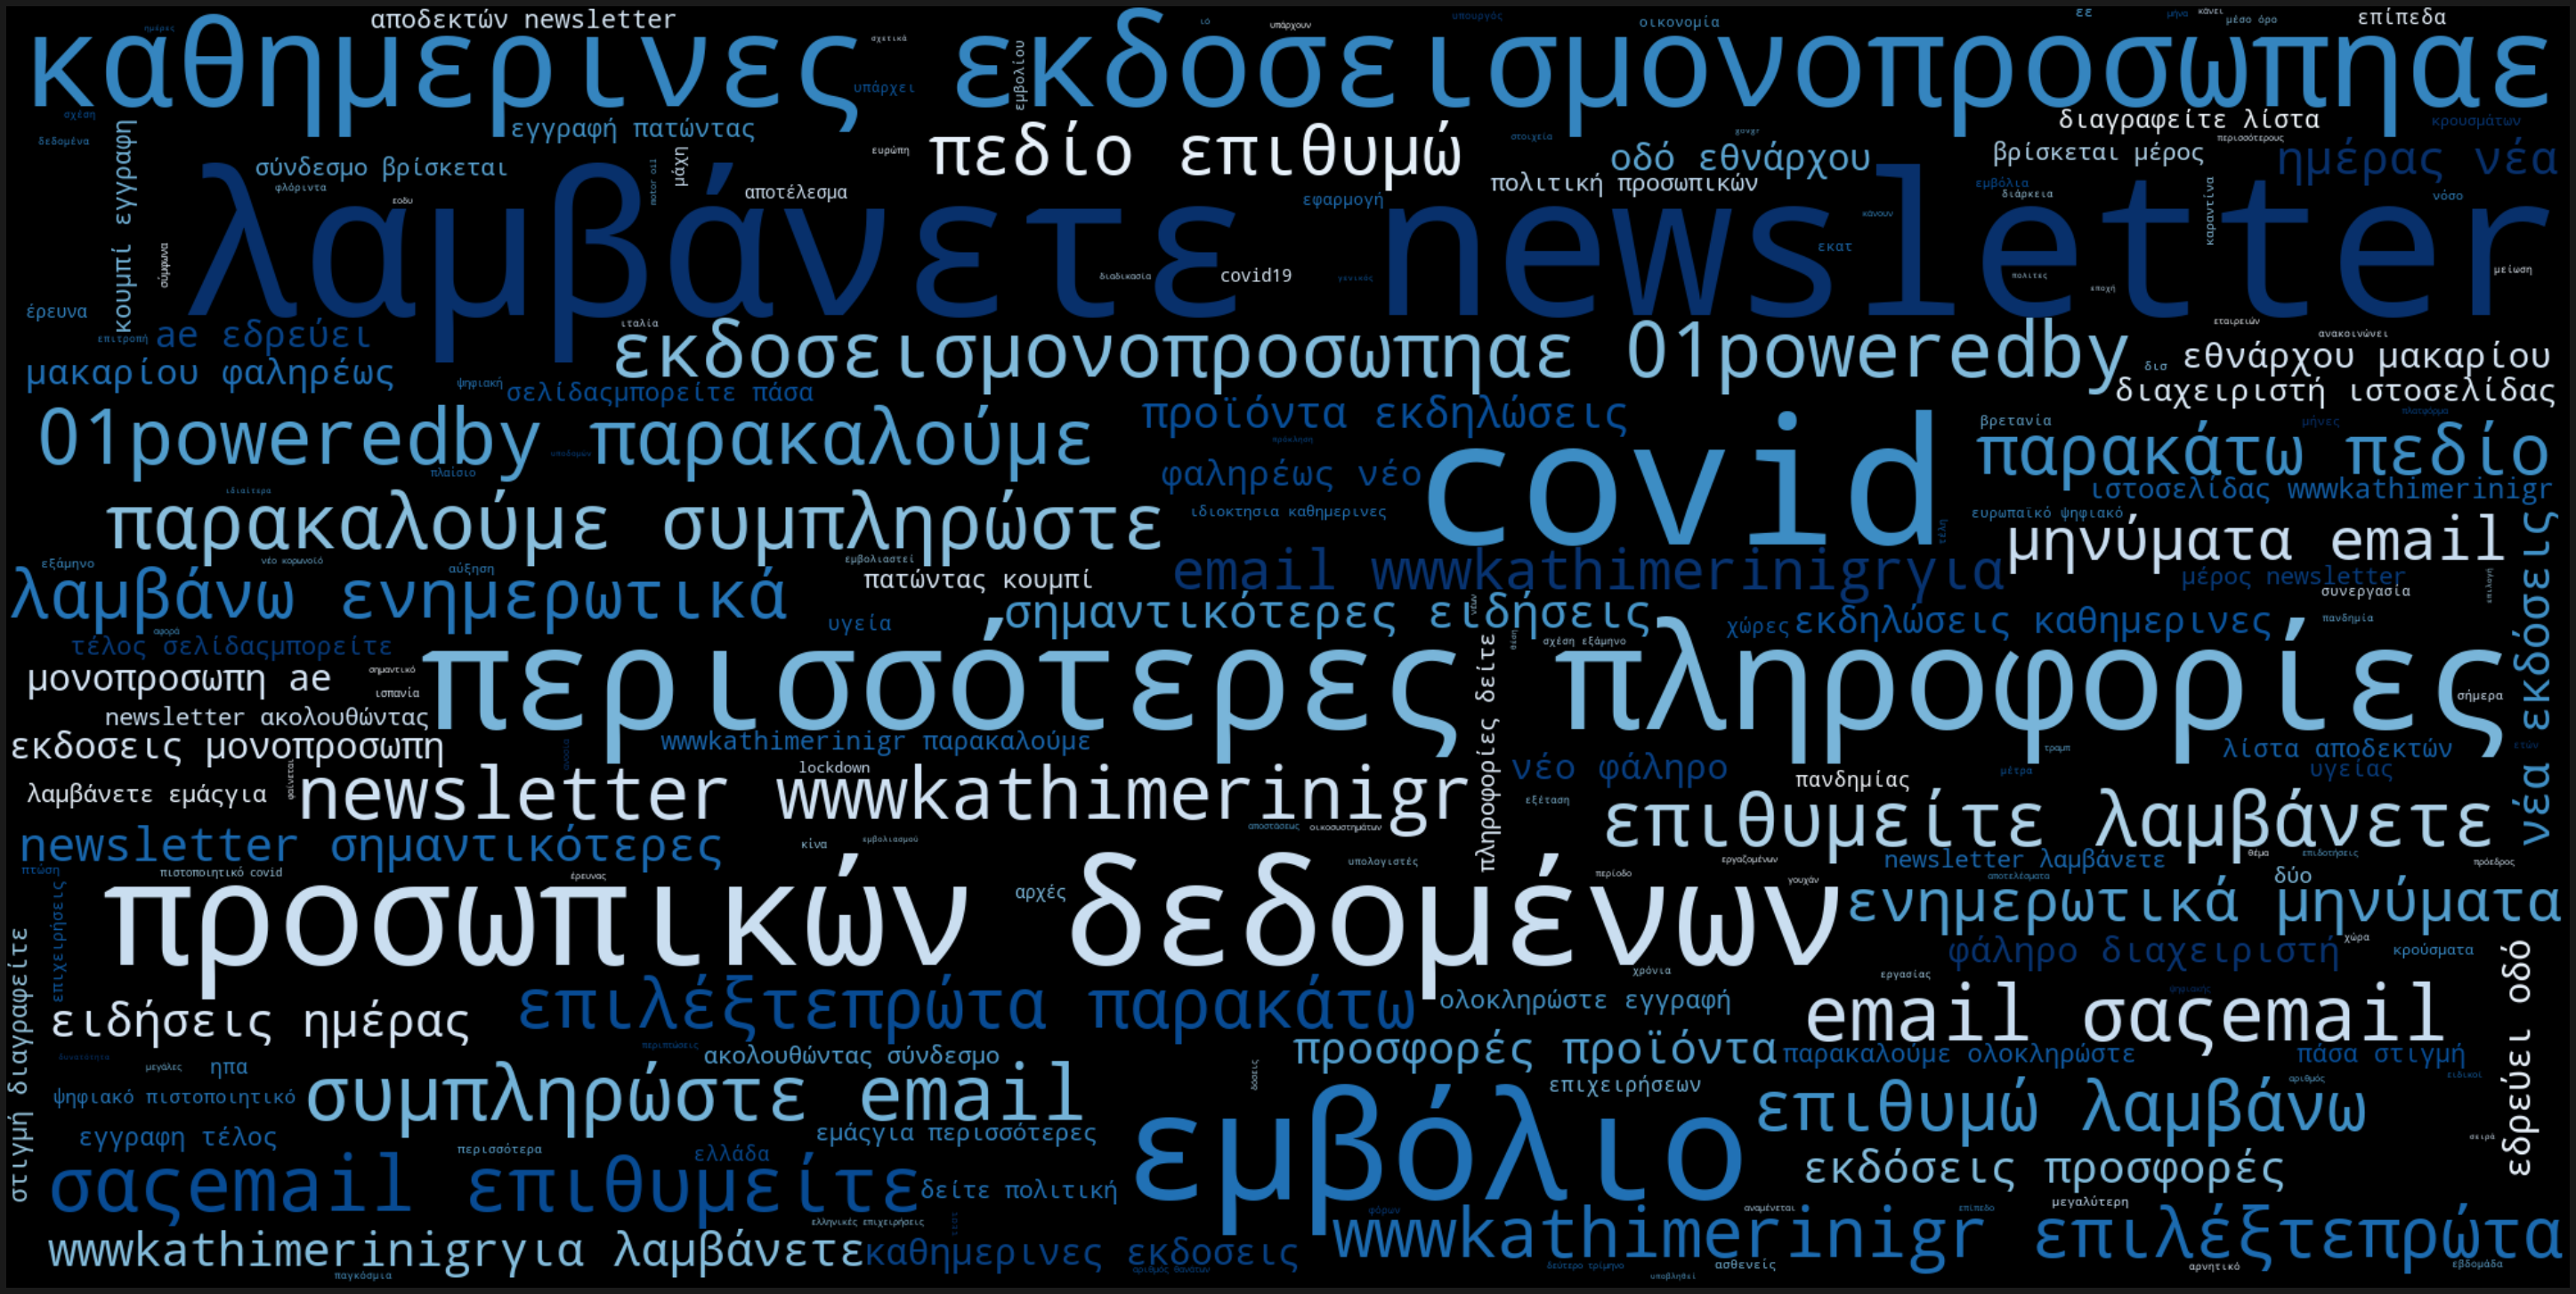

In [285]:
wordcloud = WordCloud(
    stopwords = final_stopwords,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap="Blues"
 ).generate(final_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [286]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tweets_tokens = word_tokenize(final_text)
tokens_without_sw = [word for word in tweets_tokens if not word in final_stopwords]

print(tokens_without_sw)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['θετική', 'εισήγηση', 'εμβολιασμό', 'covid-19', 'εφήβων', '1-15', 'ετών', 'έδωσε', 'ανώτατο', 'συμβούλιο', 'υγείας', 'βελγίου', 'προτείνοντας', 'εμβολιασμό', 'ευπαθών', 'εφήβωνόσων', 'βρίσκονται', 'άτομα', 'ευάλωταόπως', 'αναφέρει', 'σημερινό', 'πρωτοσέλιδο', 'δημοσίευμα', 'γαλλόφωνης', 'εφημερίδας', 'le', 'soir', 'βέλγιο', 'επιμένει', 'συντονισμένη', 'ελεύθερη', 'επιλογή', 'αφορά', 'εμβολιασμό', 'εφήβων', 'αντίθεση', 'χώρες', 'γαλλίατο', 'ισραήλ', 'βέλγιο', 'εμβολιάζει', 'συστηματικά', 'εφήβους', 'ηλικίας', '1-15', 'ετών', 'ανώτατο', 'συμβούλιο', 'υγείας', 'css', 'υποβάλλει', 'γνωμοδότησή', 'σήμερα', 'απόγευμα', 'αρμόδιες', 'αρχές', 'επισημαίνει', 'συγκεκριμένες', 'καταστάσεις', 'συνιστάται', 'εμβολιασμός', 'νέων', 'εφήβων', 'παιδιά', 'συν-νοσογόνους', 'παράγοντες', 'λευχαιμία', 'χρόνιες', 'παθήσεις', 'νεφρώντου', 'ήπατος', 'σύνδρομο', 'έμμεση', 'προστασία', 'ευάλωτων', 'συγ

[('newsletter', 84), ('λαμβάνετε', 63), ('καθημερινες', 42), ('παρακαλούμε', 42), ('email', 42), ('wwwkathimerinigr', 42), ('νέο', 34), ('νέα', 33), ('υγείας', 29), ('βρίσκεται', 26), ('περισσότερες', 26), ('πληροφορίες', 25), ('πολιτική', 24), ('τέλος', 23), ('προϊόντα', 23), ('μέρος', 23)]


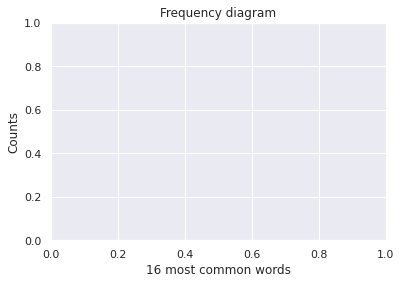

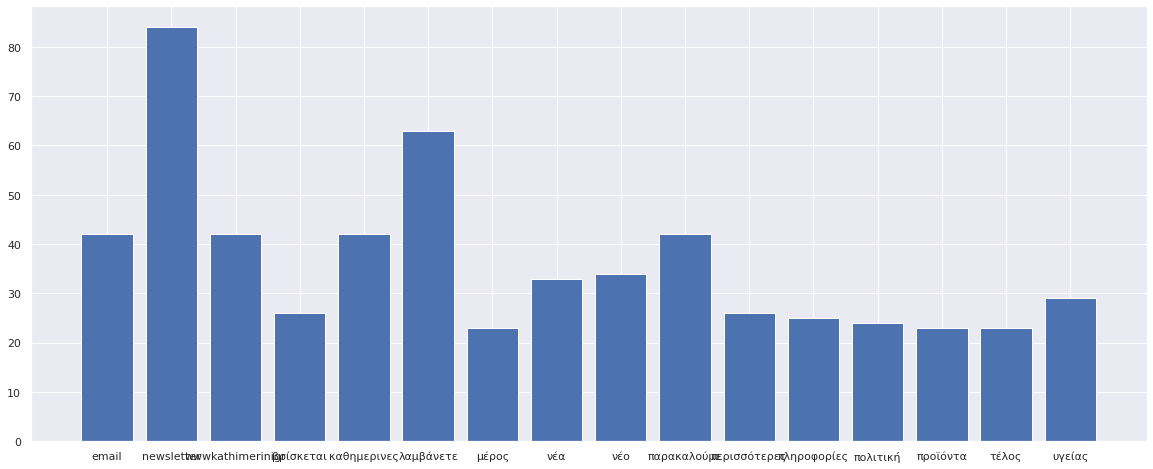

None


In [287]:
from collections import Counter

most_frequent = Counter(tokens_without_sw).most_common(16)
print(most_frequent) 

def plot_most_frequent(frequent):
    frequent = sorted(frequent, key=lambda pair: pair[0], reverse=False)
    x = list(map(lambda h: h[0], frequent))
    y = list(map(lambda h: h[1], frequent)) 
    
    plt.title("Frequency diagram")
    plt.xlabel("16 most common words")
    plt.ylabel("Counts")
    plt.figure(figsize=(20,8))

    plt.bar(x, y)
    plt.show()
    
print(plot_most_frequent(most_frequent[:16]))

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

In [289]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [290]:
count_vector = cv.fit_transform(kathimerini)

In [291]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,007,01,02,024,03,04,05,052,0539,06,07,08,087,09,10,100,10000,100000,101,1049,1096,11,112,1131,115,116,119,12,122,128,13,137,14,14415,146000,14ημερη,15,150,152,159,...,όλους,όλων,όμιλος,όμως,όνομά,όνομα,όπλο,όποιο,όποιος,όπου,όπως,όραμα,όργανα,όρεξη,όρια,όριο,όρο,όρος,όσα,όσες,όσο,όσοι,όσον,όσους,όσων,όταν,ότι,όχι,όχιιδιοκτησια,ύλες,ύπαρξης,ύστερα,ύφεση,ύφεσης13,ύψη,ώθηση,ώρα,ώρες,ώριμους,ώστε
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,8,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [292]:
cv = CountVectorizer(stop_words= final_stopwords, min_df=0.01, max_df=0.95)

In [293]:
count_vector = cv.fit_transform(kathimerini)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [294]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    return(lemmatized_tokens)

In [295]:
cv = CountVectorizer( stop_words= final_stopwords, max_features=20) 

In [296]:
results.sum(axis =0).sort_values(ascending = False)

και            419
το             396
του            281
να             272
της            270
              ... 
λειτουργίες      1
λαού             1
λανθασμένη       1
λακκοτρύπης      1
007              1
Length: 3805, dtype: int64

In [297]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(40)

και                 419
το                  396
του                 281
να                  272
της                 270
την                 258
από                 247
που                 187
σε                  185
των                 179
για                 164
με                  151
στην                129
στο                 124
είναι               122
τα                  110
θα                  108
οι                  104
τις                 101
τον                  98
ότι                  98
newsletter           84
τη                   74
τους                 66
λαμβάνετε            63
έχει                 60
δεν                  49
καθώς                47
στη                  44
στις                 44
κατά                 43
καθημερινες          42
wwwkathimerinigr     42
παρακαλούμε          42
email                42
ένα                  41
covid                41
στα                  35
νέο                  34
κάθε                 34
dtype: int64

In [298]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [299]:
tfidf_vectorizer = TfidfVectorizer(stop_words= final_stopwords, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(kathimerini)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [300]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,01,02,03,04,05,06,07,08,09,10,12,14,15,17,18547,19,1η,200,2014,2019,2020,2021,2021poweredby,24,25,27,30,35,50,70,75,ae,aegean,airlines,clinic,covid,covid19,digital,email,govgr,...,τροφίμων,τρόπο,υγεία,υγείας,υλικό,υπάρχει,υπάρχουν,υπερβαίνει,υποβληθεί,υποδομών,υπολογιστές,υπουργός,υόρκη,φάληρο,φαίνεται,φαληρέως,φλόριντα,φόρων,χάσει,χρήση,χρήστες,χρησιμοποιούν,χρονιάς,χρόνια,χρόνο,χωρών,χώρα,χώρας,χώρες,χώρου,ψηφιακή,ψηφιακής,ψηφιακού,ψηφιακό,ωρών,όπλο,όρο,ύφεση,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207438,0.0,0.150306,0.0,0.029262,0.037834,0.000000,0.0,0.029262,0.0,0.0,0.000000,0.029262,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.029262,0.0,0.0,0.0,0.037834,0.000000,0.000000,0.058524,0.000000,...,0.0,0.000000,0.000000,0.159969,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.075153,0.0,0.029262,0.0,0.029262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.047921,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.037005,0.143537,0.000000,0.0,0.037005,0.0,0.0,0.000000,0.037005,0.0,0.0,0.0,0.0,0.0,0.0,0.095039,0.0,0.037005,0.0,0.0,0.0,0.191383,0.000000,0.000000,0.074009,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.037005,0.0,0.037005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081236,0.104832,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.012453,0.032202,0.119768,0.0,0.012453,0.0,0.0,0.031982,0.012453,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.012453,0.0,0.0,0.0,0.257614,0.000000,0.000000,0.024905,0.105833,...,0.0,0.031982,0.025571,0.000000,0.0,0.000000,0.0,0.0,0.199614,0.000000,0.0,0.000000,0.0,0.012453,0.0,0.012453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027337,0.070556,0.061180,0.0,0.082011,0.029426,0.095946,0.352778,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.021403,0.027673,0.000000,0.0,0.021403,0.0,0.0,0.000000,0.021403,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.021403,0.0,0.0,0.0,0.055345,0.000000,0.050574,0.042805,0.121264,...,0.0,0.000000,0.000000,0.000000,0.0,0.140954,0.0,0.0,0.000000,0.054968,0.0,0.164904,0.0,0.021403,0.0,0.021403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.140954,0.151723,0.054968,0.242529,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.074569,0.000000,0.000000,0.0,0.074569,0.0,0.0,0.000000,0.074569,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.074569,0.0,0.0,0.0,0.000000,0.122119,0.000000,0.149138,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.074569,0.0,0.074569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [301]:
from sklearn.metrics.pairwise import cosine_similarity


print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.1311956  0.1007898  0.08421419 0.29169178 0.09529484
  0.14039251 0.15802531 0.21740014 0.0376277  0.09434359 0.05373225
  0.15975957 0.07672445 0.14651311 0.12343103 0.12740567 0.11204842
  0.13172377 0.08600155 0.04855661 0.10988185 0.0446604 ]]


In [302]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.1311956  0.1007898  0.08421419 0.29169178 0.09529484
  0.14039251 0.15802531 0.21740014 0.0376277  0.09434359 0.05373225
  0.15975957 0.07672445 0.14651311 0.12343103 0.12740567 0.11204842
  0.13172377 0.08600155 0.04855661 0.10988185 0.0446604 ]
 [0.1311956  1.         0.17331609 0.14351207 0.27273992 0.19091958
  0.14064439 0.15366266 0.16124301 0.06125964 0.10999669 0.11108849
  0.1893798  0.1014367  0.17518853 0.2335596  0.17044412 0.26163849
  0.15285697 0.13149045 0.01719521 0.08942305 0.0412358 ]
 [0.1007898  0.17331609 1.         0.56448801 0.1230932  0.11770968
  0.09211538 0.09331659 0.113382   0.02717103 0.05815501 0.05651963
  0.08401804 0.03870415 0.08272224 0.11868849 0.06391153 0.07827277
  0.07489979 0.08807581 0.04114865 0.06460922 0.08340624]
 [0.08421419 0.14351207 0.56448801 1.         0.20255337 0.10229783
  0.09210808 0.09552068 0.09897789 0.03707405 0.04712857 0.09950244
  0.10182087 0.06278676 0.10309743 0.09936262 0.10414685 0.

In [303]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [304]:
import matplotlib.pyplot as plt


array([[1.        , 0.1311956 , 0.1007898 , 0.08421419, 0.29169178,
        0.09529484, 0.14039251, 0.15802531, 0.21740014, 0.0376277 ,
        0.09434359, 0.05373225, 0.15975957, 0.07672445, 0.14651311,
        0.12343103, 0.12740567, 0.11204842, 0.13172377, 0.08600155,
        0.04855661, 0.10988185, 0.0446604 ],
       [0.1311956 , 1.        , 0.17331609, 0.14351207, 0.27273992,
        0.19091958, 0.14064439, 0.15366266, 0.16124301, 0.06125964,
        0.10999669, 0.11108849, 0.1893798 , 0.1014367 , 0.17518853,
        0.2335596 , 0.17044412, 0.26163849, 0.15285697, 0.13149045,
        0.01719521, 0.08942305, 0.0412358 ],
       [0.1007898 , 0.17331609, 1.        , 0.56448801, 0.1230932 ,
        0.11770968, 0.09211538, 0.09331659, 0.113382  , 0.02717103,
        0.05815501, 0.05651963, 0.08401804, 0.03870415, 0.08272224,
        0.11868849, 0.06391153, 0.07827277, 0.07489979, 0.08807581,
        0.04114865, 0.06460922, 0.08340624],
       [0.08421419, 0.14351207, 0.56448801, 1.   

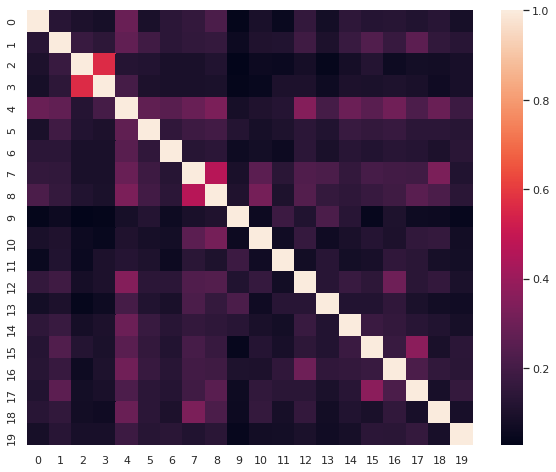

In [305]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

plt.figure(figsize= (10,8))
ax = sns.heatmap(cosine_similarity(results.head(20), results.head(20)))
cosine_similarity(X=tfidf_matrix_train, Y=None, dense_output=True)

In [306]:
#analysi sunaisthimatos
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [307]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [309]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= final_stopwords,
                      ngram_range=(1, 2))

In [310]:
emolex_df['word'].head(10)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
5              ορμος
6               υδρα
7       αγια τραπεζα
8               αμην
9             απατσι
Name: word, dtype: object

In [312]:
matrix = vec.fit_transform(kathimerini)
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've', 'αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [313]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [314]:
kathimerini['anger'] = wordcount_df[angry_words].sum(axis=1)

kathimerini['positivity'] = wordcount_df[positive_words].sum(axis=1)


kathimerini['joy'] = wordcount_df[joy_words].sum(axis=1)


kathimerini['disgust'] = wordcount_df[disgust_words].sum(axis=1)



kathimerini['surprise'] = wordcount_df[surprise_words].sum(axis=1)

kathimerini['trust'] = wordcount_df[trust_words].sum(axis=1)


kathimerini['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


kathimerini['sadness'] = wordcount_df[sadness_words].sum(axis=1)

kathimerini['negative'] = wordcount_df[negative_words].sum(axis=1)

kathimerini['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
